<a href="https://colab.research.google.com/github/JV-Machado/NBA_team_clustering/blob/master/NBA_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [371]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [372]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Montando o Dataset

In [373]:
soup_url = requests.get("https://www.basketball-reference.com/leagues/NBA_2023.html#all_per_game_team-opponent")
soup = BeautifulSoup(soup_url.content)

In [374]:
#table = soup.find("table", attrs={"id" : "per_game_stats"})
table_team = soup.find(lambda tag: tag.name=="table" and tag.has_attr('id') and tag['id']=="per_poss-team")
table_opponent = soup.find(lambda tag: tag.name=="table" and tag.has_attr('id') and tag['id']=="per_poss-opponent")

In [375]:
th = table_team.find("thead").find("tr").find_all("th")

In [376]:
header = []
for t in th:
  header.append(t.getText())

In [377]:
header = header[1:]
header

['Team',
 'G',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [378]:
data_team = table_team.find('tbody').find_all('tr')
data_opponent = table_opponent.find('tbody').find_all('tr')

In [379]:
nba_teams = []
for team in data_team:
  stats = [td.getText() for td in team.find_all('td')]
  nba_teams.append(stats)

In [380]:
nba_opponents = []
for opponent in data_opponent:
  stats = [td.getText() for td in opponent.find_all('td')]
  nba_opponents.append(stats)

In [381]:
df_team = pd.DataFrame(columns=header, data=nba_teams)
df_opponents = pd.DataFrame(columns=header, data=nba_opponents)

In [382]:
team_pts = df_team[['Team', 'PTS', 'FG%']].rename(columns={'PTS': 'Points Scored', 'FG%': 'FG% Team'})
opponent_pts = df_opponents[['Team', 'PTS', 'FG%']].rename(columns={'PTS': 'Points Conceded', 'FG%': 'FG% Opponent'})

In [383]:
df = pd.merge(team_pts, opponent_pts).sort_values('Team')
df

,Team,Points Scored,FG% Team,Points Conceded,FG% Opponent
6,Atlanta Hawks*,116.6,.483,116.3,.486
1,Boston Celtics*,118.0,.475,111.5,.463
16,Brooklyn Nets*,115.0,.487,114.1,.463
29,Charlotte Hornets,109.2,.457,115.3,.477
23,Chicago Bulls*,113.5,.490,112.2,.468
7,Cleveland Cavaliers*,116.1,.488,110.6,.468
5,Dallas Mavericks,116.8,.475,116.7,.485
4,Denver Nuggets*,117.6,.504,114.2,.478
27,Detroit Pistons,110.7,.454,118.9,.489
8,Golden State Warriors*,116.1,.479,114.4,.469


In [384]:
columns_to_convert = ['Points Scored', 'Points Conceded', 'FG% Team', 'FG% Opponent']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

In [385]:
mean = df['Points Scored'].mean().round(1)
df['Points Scored Diff'] = df['Points Scored'].map(lambda x: x - mean)
df['Points Conceded Diff'] = df['Points Conceded'].map(lambda x: mean - x)

In [386]:
df

,Team,Points Scored,FG% Team,Points Conceded,FG% Opponent,Points Scored Diff,Points Conceded Diff
6,Atlanta Hawks*,116.6,0.483,116.3,0.486,1.8,-1.5
1,Boston Celtics*,118.0,0.475,111.5,0.463,3.2,3.3
16,Brooklyn Nets*,115.0,0.487,114.1,0.463,0.2,0.7
29,Charlotte Hornets,109.2,0.457,115.3,0.477,-5.6,-0.5
23,Chicago Bulls*,113.5,0.490,112.2,0.468,-1.3,2.6
7,Cleveland Cavaliers*,116.1,0.488,110.6,0.468,1.3,4.2
5,Dallas Mavericks,116.8,0.475,116.7,0.485,2.0,-1.9
4,Denver Nuggets*,117.6,0.504,114.2,0.478,2.8,0.6
27,Detroit Pistons,110.7,0.454,118.9,0.489,-4.1,-4.1
8,Golden State Warriors*,116.1,0.479,114.4,0.469,1.3,0.4


# Normalização e treinamento

In [387]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [388]:
teams = pd.factorize(df['Team'])[1]
df['Team'] = pd.factorize(df['Team'])[0]
df

,Team,Points Scored,FG% Team,Points Conceded,FG% Opponent,Points Scored Diff,Points Conceded Diff
6,0,116.6,0.483,116.3,0.486,1.8,-1.5
1,1,118.0,0.475,111.5,0.463,3.2,3.3
16,2,115.0,0.487,114.1,0.463,0.2,0.7
29,3,109.2,0.457,115.3,0.477,-5.6,-0.5
23,4,113.5,0.490,112.2,0.468,-1.3,2.6
7,5,116.1,0.488,110.6,0.468,1.3,4.2
5,6,116.8,0.475,116.7,0.485,2.0,-1.9
4,7,117.6,0.504,114.2,0.478,2.8,0.6
27,8,110.7,0.454,118.9,0.489,-4.1,-4.1
8,9,116.1,0.479,114.4,0.469,1.3,0.4


In [389]:
columns_to_normalize = ['Points Scored', 'Points Conceded', 'FG% Team', 'FG% Opponent', 'Points Scored Diff', 'Points Conceded Diff']

In [390]:
mms = MinMaxScaler()
df_normalized = mms.fit_transform(df[columns_to_normalize])

In [391]:
for i, col in enumerate(columns_to_normalize):
  df[col] = df_normalized[:, i]

In [392]:
df

,Team,Points Scored,FG% Team,Points Conceded,FG% Opponent,Points Scored Diff,Points Conceded Diff
6,0,0.725490,0.58,0.606383,0.611111,0.725490,0.393617
1,1,0.862745,0.42,0.095745,0.185185,0.862745,0.904255
16,2,0.568627,0.66,0.372340,0.185185,0.568627,0.627660
29,3,0.000000,0.06,0.500000,0.444444,0.000000,0.500000
23,4,0.421569,0.72,0.170213,0.277778,0.421569,0.829787
7,5,0.676471,0.68,0.000000,0.277778,0.676471,1.000000
5,6,0.745098,0.42,0.648936,0.592593,0.745098,0.351064
4,7,0.823529,1.00,0.382979,0.462963,0.823529,0.617021
27,8,0.147059,0.00,0.882979,0.666667,0.147059,0.117021
8,9,0.676471,0.50,0.404255,0.296296,0.676471,0.595745


In [393]:
kmeans = KMeans(n_clusters=13, random_state=0, n_init="auto").fit(df)
df['cluster'] = kmeans.labels_

In [394]:
df

,Team,Points Scored,FG% Team,Points Conceded,FG% Opponent,Points Scored Diff,Points Conceded Diff,cluster
6,0,0.725490,0.58,0.606383,0.611111,0.725490,0.393617,5
1,1,0.862745,0.42,0.095745,0.185185,0.862745,0.904255,5
16,2,0.568627,0.66,0.372340,0.185185,0.568627,0.627660,9
29,3,0.000000,0.06,0.500000,0.444444,0.000000,0.500000,9
23,4,0.421569,0.72,0.170213,0.277778,0.421569,0.829787,2
7,5,0.676471,0.68,0.000000,0.277778,0.676471,1.000000,2
5,6,0.745098,0.42,0.648936,0.592593,0.745098,0.351064,10
4,7,0.823529,1.00,0.382979,0.462963,0.823529,0.617021,10
27,8,0.147059,0.00,0.882979,0.666667,0.147059,0.117021,8
8,9,0.676471,0.50,0.404255,0.296296,0.676471,0.595745,8


In [395]:
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(silhouette_avg)

0.6881714781469987


<Axes: >

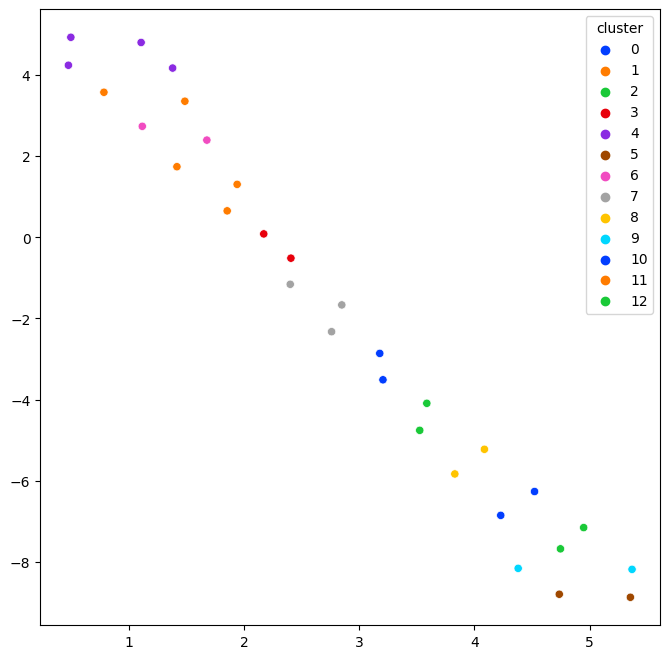

In [407]:
tsne = TSNE(perplexity=10)
plt.figure(figsize=(8,8))
teste = tsne.fit_transform(df.drop(columns='cluster'))
sns.scatterplot(x=teste[:, 0], y=teste[:, 1], hue=df['cluster'], palette='bright')